In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("indicators.csv", encoding="utf-16")
df

,Time,Ticker,Bid,Ask,ADX_M1,RSI_M1,StdDev_M1,ADX_M5,RSI_M5,StdDev_M5,...,ADX_D1,RSI_D1,StdDev_D1,ADX_W1,RSI_W1,StdDev_W1,ADX_MN1,RSI_MN1,StdDev_MN1,
0,2025.01.02 00:01,EURUSD,1.03498,1.03568,62.007,26.263,0.000255,27.024,31.133,0.000310,...,22.195,35.619,0.007326,45.227,30.531,0.028109,28.212,30.531,0.028109,NaN
1,2025.01.02 00:02,EURUSD,1.03510,1.03583,65.437,29.056,0.000246,27.024,35.089,0.000295,...,22.195,35.795,0.007319,45.227,30.567,0.028100,28.212,30.567,0.028100,NaN
2,2025.01.02 00:02,EURUSD,1.03515,1.03588,65.437,30.564,0.000243,27.024,36.606,0.000289,...,22.195,35.867,0.007315,45.227,30.583,0.028096,28.212,30.583,0.028096,NaN
3,2025.01.02 00:04,EURUSD,1.03508,1.03580,71.466,28.234,0.000243,27.024,34.461,0.000297,...,22.195,35.765,0.007320,45.227,30.561,0.028102,28.212,30.561,0.028102,NaN
4,2025.01.02 00:05,EURUSD,1.03515,1.03540,73.917,31.508,0.000229,30.183,36.606,0.000312,...,22.195,35.867,0.007315,45.227,30.583,0.028096,28.212,30.583,0.028096,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41754,2025.01.30 23:55,EURUSD,1.03913,1.03920,16.400,43.224,0.000113,14.676,36.605,0.001365,...,21.257,49.248,0.007560,45.381,39.447,0.027686,29.919,39.447,0.027686,NaN
41755,2025.01.30 23:56,EURUSD,1.03918,1.03929,17.438,44.623,0.000111,15.022,36.963,0.001363,...,21.257,49.296,0.007561,45.381,39.464,0.027683,29.919,39.464,0.027683,NaN
41756,2025.01.30 23:57,EURUSD,1.03923,1.03932,16.248,46.489,0.000104,14.904,37.378,0.001361,...,21.257,49.346,0.007562,45.381,39.481,0.027681,29.919,39.481,0.027681,NaN
41757,2025.01.30 23:58,EURUSD,1.03917,1.03925,12.768,44.549,0.000104,13.755,36.891,0.001363,...,21.257,49.287,0.007561,45.381,39.461,0.027684,29.919,39.461,0.027684,NaN


In [2]:
# Drop irrelevant data
df = df.drop_duplicates()
df = df.dropna(axis=1)
df = df.reset_index(drop=True)

# Group by indicators
RSIs    = df.filter(like="RSI_")
ADXs    = df.filter(like="ADX_")
StdDevs = df.filter(like="StdDev_")

In [3]:
from sklearn.linear_model import LinearRegression

# Linear regression function
def getTrend(data):

    Y = np.array(data)
    X = np.linspace(0,1,Y.size).reshape(-1,1)

    reg = LinearRegression().fit(X, Y)

    return reg.score(X, Y), reg.coef_[0], reg.intercept_
    # Score returns the coefficient of determination of the prediction (the closer to 1 the better)
    # Should be used alongside a threshold parameter to remove inconclusive data (which should itself be adjsuted with backtesting)

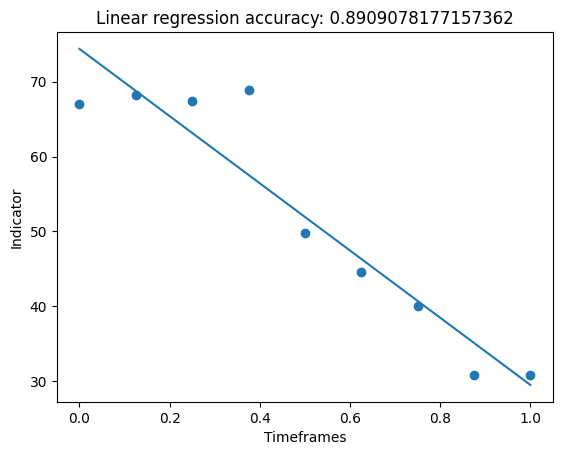

In [4]:
import matplotlib.pyplot as plt

#Visual arbitrary example with a random RSI value
entry = RSIs.iloc[12345]

score, coef, intercept = getTrend(entry)

y = np.array(entry)
x = np.linspace(0,1,y.size).reshape(-1,1)

plt.scatter(x,y)
plt.plot(x, (coef * x + intercept))

plt.title(f"Linear regression accuracy: {score}")
plt.ylabel("Indicator")
plt.xlabel("Timeframes")

plt.show()


In [5]:
RSIs[["Score", "Slope", "Intercept"]]       = RSIs.apply(getTrend, axis=1, result_type="expand") 
ADXs[["Score", "Slope", "Intercept"]]       = ADXs.apply(getTrend, axis=1, result_type="expand")
StdDevs[["Score", "Slope", "Intercept"]]    = StdDevs.apply(getTrend, axis=1, result_type="expand")
# About 30s on personal laptop to compute each 

# Been unable to remove the 'SettingWithCopyWarning' warning

RSIs



C:\Users\barbe\AppData\Local\Temp\ipykernel_10744\1213560805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RSIs[["Score", "Slope", "Intercept"]]       = RSIs.apply(getTrend, axis=1, result_type="expand")
C:\Users\barbe\AppData\Local\Temp\ipykernel_10744\1213560805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RSIs[["Score", "Slope", "Intercept"]]       = RSIs.apply(getTrend, axis=1, result_type="expand")
C:\Users\barbe\AppData\Local\Temp\ipykernel_10744\1213560805.py:1: SettingWithCopyWarning: 


,RSI_M1,RSI_M5,RSI_M15,RSI_H1,RSI_H6,RSI_H12,RSI_D1,RSI_W1,RSI_MN1,Score,Slope,Intercept
0,26.263,31.133,37.067,29.468,36.017,36.396,35.619,30.531,30.531,0.053591,2.573067,31.271800
1,29.056,35.089,38.700,30.457,36.390,36.649,35.795,30.567,30.567,0.008585,-0.952000,34.172667
2,30.564,36.606,39.355,30.861,36.544,36.754,35.867,30.583,30.583,0.062081,-2.543467,35.462511
3,28.234,34.461,38.433,30.294,36.328,36.607,35.765,30.561,30.561,0.000323,-0.188667,33.565889
4,31.508,36.606,39.355,30.861,36.544,36.754,35.867,30.583,30.583,0.094978,-3.046933,35.819133
...,...,...,...,...,...,...,...,...,...,...,...,...
29987,43.224,36.605,35.890,40.573,44.365,49.052,49.248,39.447,39.447,0.071491,3.815067,40.075911
29988,44.623,36.963,36.110,40.707,44.446,49.121,49.296,39.464,39.464,0.040941,2.887067,40.800244
29989,46.489,37.378,36.333,40.843,44.527,49.190,49.346,39.481,39.481,0.013549,1.686667,41.719778
29990,44.549,36.891,36.066,40.680,44.430,49.107,49.287,39.461,39.461,0.042987,2.963600,40.732867


In [6]:
RSIs["Slope"] = (RSIs["Slope"] - RSIs["Slope"].mean())/ (RSIs["Slope"].max() - RSIs["Slope"].min()) # Mean normalization

RSIs["Prediction"] = (RSIs["Slope"]*RSIs["Score"])

RSIs.sort_values(by=['Prediction'], ascending=False)

C:\Users\barbe\AppData\Local\Temp\ipykernel_10744\1045871070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RSIs["Slope"] = (RSIs["Slope"] - RSIs["Slope"].mean())/ (RSIs["Slope"].max() - RSIs["Slope"].min()) # Mean normalization
C:\Users\barbe\AppData\Local\Temp\ipykernel_10744\1045871070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RSIs["Prediction"] = (RSIs["Slope"]*RSIs["Score"])


,RSI_M1,RSI_M5,RSI_M15,RSI_H1,RSI_H6,RSI_H12,RSI_D1,RSI_W1,RSI_MN1,Score,Slope,Intercept,Prediction
25752,7.668,8.811,21.301,37.467,56.100,58.720,56.149,41.829,41.829,0.564457,0.517687,14.876200,0.292212
25756,11.037,7.287,18.968,35.319,54.811,57.696,55.392,41.565,41.565,0.569367,0.510218,14.615267,0.290501
25761,14.780,5.999,16.788,33.072,53.357,56.527,54.520,41.256,41.256,0.565280,0.499171,14.577622,0.282172
25760,14.448,6.341,17.390,33.718,53.787,56.874,54.780,41.349,41.349,0.562860,0.499137,14.855289,0.280944
25762,15.168,5.986,16.764,33.047,53.340,56.513,54.510,41.253,41.253,0.562954,0.497447,14.708289,0.280040
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11275,90.383,85.379,73.970,57.871,39.724,38.117,34.562,27.620,27.620,0.923412,-0.462184,87.665044,-0.426786
11274,90.441,85.424,74.012,57.906,39.746,38.131,34.574,27.628,27.628,0.923451,-0.462636,87.718289,-0.427221
11330,86.697,93.678,83.442,66.248,45.865,42.207,38.117,29.654,29.654,0.916080,-0.476066,92.947000,-0.436115
11328,87.217,93.381,83.042,65.839,45.531,41.976,37.914,29.534,29.534,0.918081,-0.477747,92.867022,-0.438610


In [7]:
# Timeframe values
TimeframeValues = np.array([1, 5, 15, 60, 360, 720, 1440, 10080, 43200])